# Investments Assignment 2
**Group 1:** *Micah Yo Maheo, Majda Mechti, Xiaohe Xu*

## Problem 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#a
AAPL = pd.read_csv('Returns_Stocks.csv',sep=';',usecols=['date','AAPL']).set_index('date')
AAPL_wind = AAPL[abs(AAPL['AAPL'])<0.04]

GE = pd.read_csv('Returns_Stocks.csv',sep=';',usecols=['date','GE']).set_index('date')
GE_wind = GE[abs(GE['GE'])<0.04]

GME = pd.read_csv('Returns_Stocks.csv',sep=';',usecols=['date','GME']).set_index('date')
GME_wind = GME[abs(GME['GME'])<0.04]

PG = pd.read_csv('Returns_Stocks.csv',sep=';',usecols=['date','PG']).set_index('date')
PG_wind = PG[abs(PG['PG'])<0.04]

TSLA = pd.read_csv('Returns_Stocks.csv',sep=';',usecols=['date','TSLA']).set_index('date')
TSLA_wind = TSLA[abs(TSLA['TSLA'])<0.04]

print('AAPL mean',AAPL['AAPL'].mean(),'and variance',AAPL['AAPL'].var())
print('GE mean',GE['GE'].mean(),'and variance',GE['GE'].var())
print('GME mean',GME['GME'].mean(),'and variance',GME['GME'].var())
print('PG mean',PG['PG'].mean(),'and variance',PG['PG'].var())
print('TSLA mean',TSLA['TSLA'].mean(),'and variance',TSLA['TSLA'].var())


AAPL mean 0.0014093638301003381 and variance 0.0005224874752725483
GE mean 5.932877773216193e-05 and variance 0.00044455194236277555
GME mean 0.002025846311947748 and variance 0.0012953394087283267
PG mean 0.0004214545832437625 and variance 0.00014026132676420302
TSLA mean 0.001589729432476005 and variance 0.0025631922071486456


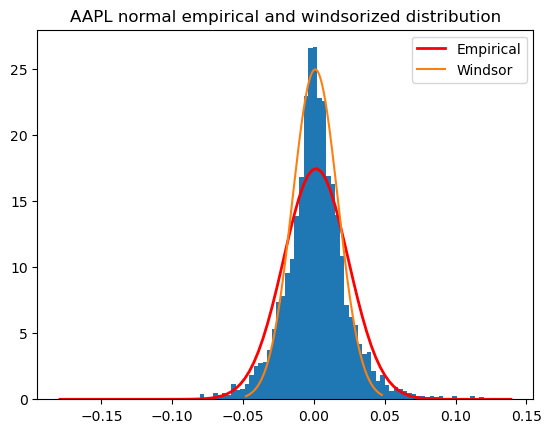

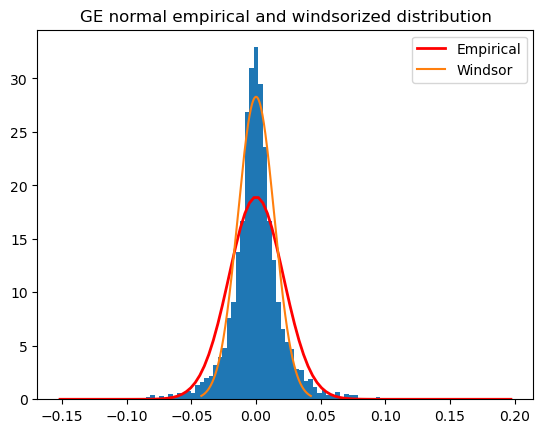

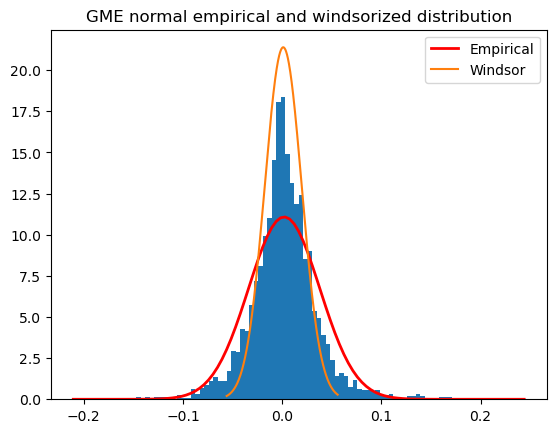

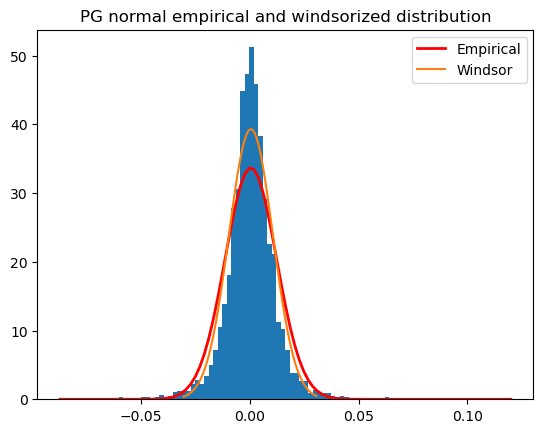

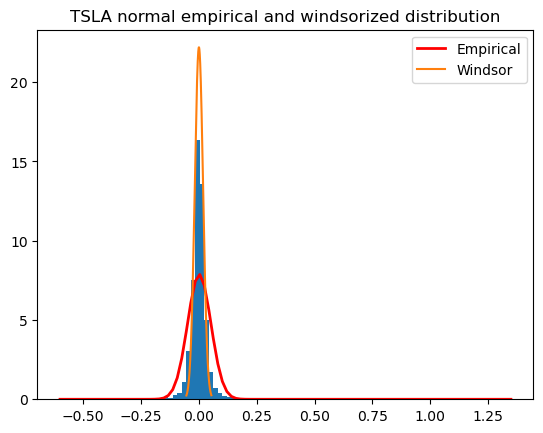

In [3]:
#b
import scipy.stats as stats

empirical = [AAPL['AAPL'],GE['GE'],GME['GME'],PG['PG'],TSLA['TSLA']]
winds = [AAPL_wind['AAPL'],GE_wind['GE'],GME_wind['GME'],PG_wind['PG'],TSLA_wind['TSLA']]
title = ['AAPL normal empirical and windsorized distribution',
         'GE normal empirical and windsorized distribution',
         'GME normal empirical and windsorized distribution',
         'PG normal empirical and windsorized distribution',
         'TSLA normal empirical and windsorized distribution']

for (e,w,t) in zip(empirical,winds,title):
    mu = e.mean()
    sigma = e.std()
    windmean = w.mean()
    windstd = w.std()
    count,bins,ignored = plt.hist(e,bins=100,density=True)
    plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins - mu)**2/(2*sigma**2)),linewidth=2,color='r',label='Empirical')
    xw = np.linspace(-3*windstd,3*windstd,500)
    plt.plot(xw, stats.norm.pdf(xw, windmean, windstd),label='Windsor')
    plt.title(t)
    plt.legend()
    plt.show()


In [4]:
#c 
from tabulate import tabulate
from scipy.stats import norm

stocks = [AAPL['AAPL'],GE['GE'],GME['GME'],PG['PG'],TSLA['TSLA']]
title = ['AAPL','GE','GME','PG','TSLA']

for (x,y) in zip(stocks,title):
    VaR_95 = x.quantile(0.05)
    VaR_99 = x.quantile(0.01)
    VaR_95norm = norm.ppf(1-0.95, x.mean(), x.std())
    VaR_99norm = norm.ppf(1-0.99, x.mean(), x.std())
    print(y)
    print(tabulate([['95%', 100*VaR_95], ['99%', 100*VaR_99], ['95% normal', 100*VaR_95norm], ['99% normal', 100*VaR_99norm]], headers = ['Confidence Level', 'VaR(%)']))
    print('------------------------------')
    print('------------------------------')
    
    CVaR_95 = x[x <= VaR_95].mean()
    CVaR_99 = x[x <= VaR_99].mean()
    CVaR_95norm = x.mean() - 0.05**(-1)*norm.pdf(norm.ppf(0.05))*x.std()
    CVaR_99norm = x.mean() - 0.01**(-1)*norm.pdf(norm.ppf(0.01))*x.std()
    print(tabulate([['95%', 100*CVaR_95], ['99%', 100*CVaR_99], ['95% normal', 100*CVaR_95norm], ['99% normal', 100*CVaR_99norm]], headers = ['Confidence Level', 'ES(%)']))
    
    print('\n')


AAPL
Confidence Level      VaR(%)
------------------  --------
95%                 -3.40699
99%                 -5.75842
95% normal          -3.61887
99% normal          -5.17663
------------------------------
------------------------------
Confidence Level       ES(%)
------------------  --------
95%                 -5.01754
99%                 -7.92782
95% normal          -4.57401
99% normal          -5.95121


GE
Confidence Level      VaR(%)
------------------  --------
95%                 -3.1015
99%                 -6.12136
95% normal          -3.46214
99% normal          -4.89903
------------------------------
------------------------------
Confidence Level       ES(%)
------------------  --------
95%                 -4.99599
99%                 -8.42504
95% normal          -4.34317
99% normal          -5.61351


GME
Confidence Level      VaR(%)
------------------  --------
95%                 -5.10999
99%                 -8.99674
95% normal          -5.71738
99% normal          

d) From the graphs above, we observe that the 'winsorized' empirical normal distribution best fits the real data, while the 'classic' normal distribution is very approximate. In addition, the empirical normal distribution seems to often overestimate the 95%-VaR,ES and underestimate the 99%-VaR,ES. The reason is most likely due to the large variations on stock prices, with outliers that are extreme and unpredictable.

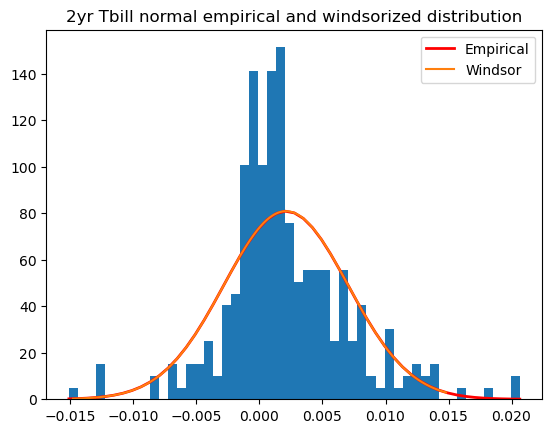

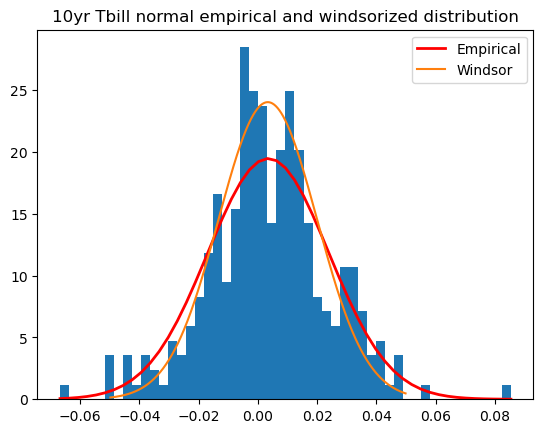

In [5]:
#e
TB2 = pd.read_csv('Returns_Bonds.csv',sep=';',usecols=['date','b2ret']).set_index('date')
TB2_wind = TB2[abs(TB2['b2ret'])<0.04]
TB10 = pd.read_csv('Returns_Bonds.csv',sep=';',usecols=['date','b10ret']).set_index('date')
TB10_wind = TB10[abs(TB10['b10ret'])<0.04]

empirical = [TB2['b2ret'],TB10['b10ret']]
winds = [TB2_wind['b2ret'],TB10_wind['b10ret']]
title = ['2yr Tbill normal empirical and windsorized distribution',
         '10yr Tbill normal empirical and windsorized distribution']

for (e,w,t) in zip(empirical,winds,title):
    mu = e.mean()
    sigma = e.std()
    windmean = w.mean()
    windstd = w.std()
    count,bins,ignored = plt.hist(e,bins=50,density=True)
    plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins - mu)**2/(2*sigma**2)),linewidth=2,color='r',label='Empirical')
    xw = np.linspace(-3*windstd,3*windstd,500)
    plt.plot(xw, stats.norm.pdf(xw, windmean, windstd),label='Windsor')
    plt.title(t)
    plt.legend()
    plt.show()


Despite the windsorized normal distribution performing (once again) better than the 'regular' empirical normal distribution, the model still does not approximate the returns very well. However, we observe that the results do improve for the 10-year treasury bond.

## Problem 2

In [6]:
import wrds
db = wrds.Connection(wrds_username='maheo')
#db.create_pgpass_file()

apple = db.raw_sql("select date, ret from crsp.dsf where permco in (7) and "
                   "date>='2000-01-01' and date<='2022-12-31'")
apple['ret'] = 1 + apple['ret']
apple = apple.set_index('date')
apple.index = pd.to_datetime(apple.index)
apple_w = apple.resample('W').prod() - 1

proct = db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and "
                   "date>='2000-01-01' and date<='2022-12-31'")
proct['ret'] = 1 + proct['ret']
proct = proct.set_index('date')
proct.index = pd.to_datetime(proct.index)
proct_w = proct.resample('W').prod() - 1


Enter your WRDS username [maheo]: mechti
Enter your password: ········


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


In [7]:
#a
dt = 52

apple_wm = apple_w['ret'].mean()*dt
apple_ws = apple_w['ret'].std()*np.sqrt(dt)
proct_wm = proct_w['ret'].mean()*dt
proct_ws = proct_w['ret'].std()*np.sqrt(dt)
ap_corr = apple_w['ret'].corr(proct_w['ret'])

print('Annualized AAPL ret:',apple_wm)
print('Annualized AAPL std:',apple_ws)

print('Annualized PG ret:',proct_wm)
print('Annualized PG std:',proct_ws)

print('The correlation between weekly AAPL and PG:',ap_corr)


Annualized AAPL ret: 0.29570602682911534
Annualized AAPL std: 0.3755829857541285
Annualized PG ret: 0.09363357459172415
Annualized PG std: 0.20818059744204004
The correlation between weekly AAPL and PG: 0.10587600932882105


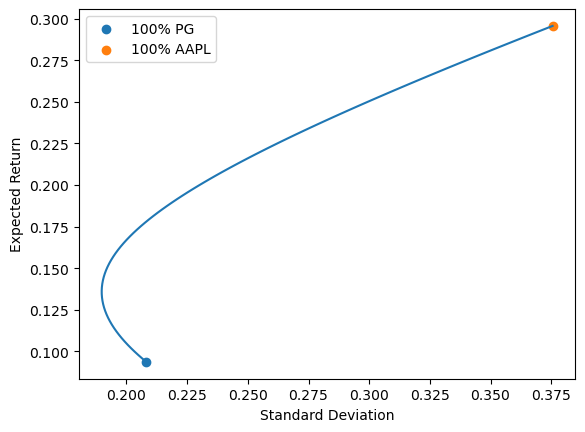

In [8]:
#b
w = np.linspace(0,1,100)
pfexr = w*apple_wm + (1-w)*proct_wm
pfstd = np.sqrt(w**2*apple_ws**2 + (1-w)**2*proct_ws**2 + 2*w*(1-w)*ap_corr*apple_ws*proct_ws)

plt.plot(pfstd,pfexr)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.scatter(proct_ws,proct_wm,label='100% PG')
plt.scatter(apple_ws,apple_wm,label='100% AAPL')
plt.legend()
plt.show()

Global minimum variance portfolio: 20.89 % AAPL and 79.11 % PG
Expected return: 0.13584408141692048
Standard Deviation: 0.189777182017044
Sharpe Ratio: 0.6367682359519249


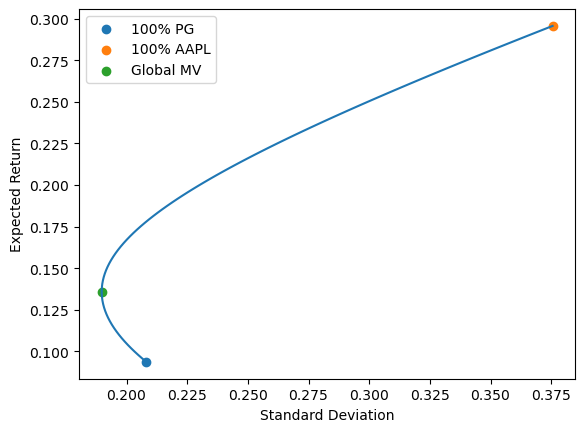

In [9]:
#c
rf = 0.015

wmin = (proct_ws**2 - ap_corr*apple_ws*proct_ws)/(apple_ws**2 + proct_ws**2 - 2*ap_corr*apple_ws*proct_ws)
gmvexr = wmin*apple_wm + (1-wmin)*proct_wm
gmvstd = np.sqrt(wmin**2*apple_ws**2 + (1-wmin)**2*proct_ws**2 + 2*wmin*(1-wmin)*ap_corr*apple_ws*proct_ws)
gmvsr = (gmvexr-rf)/(gmvstd)

print('Global minimum variance portfolio:',round(wmin,4)*100,'% AAPL and',round(1-wmin,4)*100,'% PG')
print('Expected return:',gmvexr)
print('Standard Deviation:',gmvstd)
print('Sharpe Ratio:',gmvsr)

plt.plot(pfstd,pfexr)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.scatter(proct_ws,proct_wm,label='100% PG')
plt.scatter(apple_ws,apple_wm,label='100% AAPL')
plt.scatter(gmvstd,gmvexr,label='Global MV')
plt.legend()
plt.show()

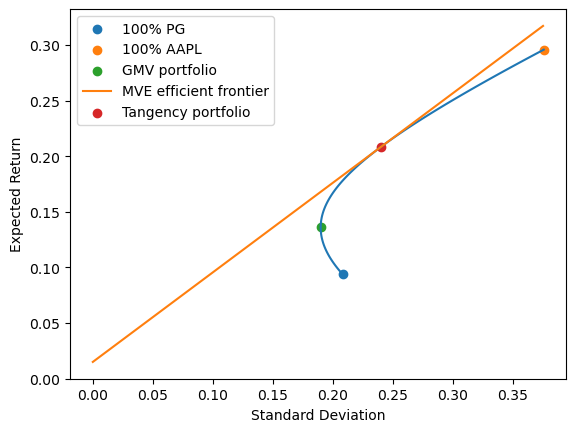

In [10]:
#d
A = apple_wm - rf
B = proct_wm - rf
mu_rf = np.matrix([[A],[B]])
Sigma = np.matrix([[apple_ws**2,ap_corr*apple_ws*proct_ws],[ap_corr*apple_ws*proct_ws,proct_ws**2]])
sr_tan = np.sqrt(mu_rf.getT()@Sigma.getI()@mu_rf)

x = np.linspace(0,0.375,100)
mve_frontier = rf + sr_tan[0,0]*x
wtan = (Sigma.getI()@mu_rf)/(np.ones(2)@Sigma.getI()@mu_rf)
tpexr = wtan[0,0]*apple_wm + wtan[1,0]*proct_wm
tpstd = np.sqrt(wtan[0,0]**2*apple_ws**2 + wtan[1,0]**2*proct_ws**2 
                + 2*wtan[0,0]*wtan[1,0]*ap_corr*apple_ws*proct_ws)

plt.plot(pfstd,pfexr)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.scatter(proct_ws,proct_wm,label='100% PG')
plt.scatter(apple_ws,apple_wm,label='100% AAPL')
plt.scatter(gmvstd,gmvexr,label='GMV portfolio')
plt.plot(x,mve_frontier,label='MVE efficient frontier')
plt.scatter(tpstd,tpexr,label='Tangency portfolio')
plt.legend()
plt.show()


In [11]:
#e
ap_corr2010 = apple_w['ret']['2010-01-01':'2020-12-31'].corr(proct_w['ret']['2010-01-01':'2020-12-31'])
print('New correlation from 2010:',ap_corr2010)

wmin2010 = (proct_ws**2 - ap_corr2010*apple_ws*proct_ws)/(apple_ws**2 + 
            proct_ws**2 - 2*ap_corr2010*apple_ws*proct_ws)
gmvstd2010 = np.sqrt(wmin2010**2*apple_ws**2 + (1-wmin2010)**2*proct_ws**2 + 
                     2*wmin2010*(1-wmin2010)*ap_corr2010*apple_ws*proct_ws)
print('All else equal, new volatility of GMV portfolio:',gmvstd2010)
print('The new volatility is',round(100*(gmvstd2010-gmvstd)/gmvstd,4),'% more significant than before.')

New correlation from 2010: 0.31862945945851456
All else equal, new volatility of GMV portfolio: 0.2020305085034755
The new volatility is 6.4567 % more significant than before.


20% std portfolio: 47.3 % in AAPL, 36.02 % in PG and 16.68 % in R0
Implied risk aversion coefficient: a = 4.0273
Mean return: 0.1761
Sharpe ratio: 0.8055


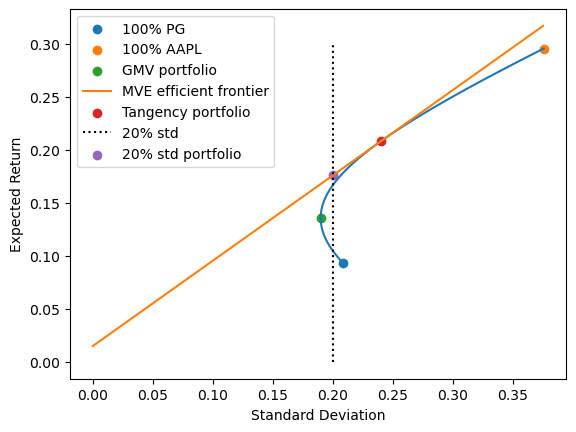

In [12]:
#f
pf20exr = rf + sr_tan[0,0]*0.20
C = (np.ones(2)@Sigma.getI()@mu_rf)[0,0]
a = C*(tpexr-rf)/(pf20exr-rf)
pf20x = C/a
print('20% std portfolio:',round(pf20x*wtan[0,0],4)*100,'% in AAPL,',
      round(pf20x*wtan[1,0],4)*100,'% in PG and',round(1-pf20x,4)*100,'% in R0')
print('Implied risk aversion coefficient: a =',round(a,4))
print('Mean return:',round(pf20exr,4))
print('Sharpe ratio:',round((pf20exr-rf)/0.20,4))

plt.plot(pfstd,pfexr)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.scatter(proct_ws,proct_wm,label='100% PG')
plt.scatter(apple_ws,apple_wm,label='100% AAPL')
plt.scatter(gmvstd,gmvexr,label='GMV portfolio')
plt.plot(x,mve_frontier,label='MVE efficient frontier')
plt.scatter(tpstd,tpexr,label='Tangency portfolio')
plt.vlines(x=0.20,ymin=0,ymax=0.30,colors='k',linestyles='dotted',label='20% std')
plt.scatter(0.20,pf20exr,label='20% std portfolio')
plt.legend()
plt.show()


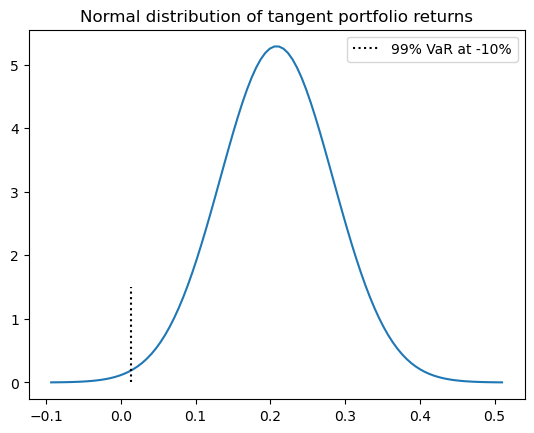

Obtained 99% VaR at -10%: 0.013734043100626536
Optimal weight in tangency portfolio: 0.31423488527923893


In [13]:
#g
mu = tpexr
w = (-0.1-rf)/(mu-rf-2.33*tpstd)
sigma = tpstd*w
x = np.linspace(mu - 4*sigma,mu + 4*sigma, 100)
VaR_99 = mu-2.58*sigma
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.vlines(VaR_99,0,1.50,colors='k',linestyles='dotted',label='99% VaR at -10%')
plt.title('Normal distribution of tangent portfolio returns')
plt.legend()
plt.show()
print('Obtained 99% VaR at -10%:',VaR_99)
print('Optimal weight in tangency portfolio:',w)
